## WNS Analytics Wizard 2018
Your client is a large MNC and they have 9 broad verticals across the organisation. One of the problem your client is facing is around identifying the right people for promotion (only for manager position and below) and prepare them in time. Currently the process, they are following is:

1.They first identify a set of employees based on recommendations/ past performance

2.Selected employees go through the separate training and evaluation program for each vertical. These programs are based on the required skill of each vertical

3.At the end of the program, based on various factors such as training performance, KPI completion (only employees with KPIs completed greater than 60% are considered) etc., employee gets promotion

For above mentioned process, the final promotions are only announced after the evaluation and this leads to delay in transition to their new roles. Hence, company needs your help in identifying the eligible candidates at a particular checkpoint so that they can expedite the entire promotion cycle.

##  **Objective of the Project**

### 1. **Feature Analysis and Selection**  
- To **analyze multiple attributes** about employees' past and current performance along with demographic information from the dataset.  
- Identify the most **important features** among the available dataset attributes that contribute significantly to predicting promotion eligibility.  

### 2. **Promotion Eligibility Prediction**  
- To build a **binary classification model** to predict whether a potential employee will be promoted or not at a given checkpoint.  
- The target variable is binary:  
  - **1**: Employee is **Promoted**  
  - **0**: Employee is **Not Promoted**  



## 1. Dataset Description

* The training dataset has:
* Number of instances or data points: 54808
* Number of variables or attributes: 14

| Variable | Definition |  
|:---|:---|  
| employee_id: | Unique ID for employee |
| department: | Department of employee |    
| region: | Region of employment (unordered) |  
| education: | 	Education Level |
| gender: | Gender of Employee |  
| recruitment_channel: | 	Channel of recruitment for employee |
| no_of_trainings: | 	no of other trainings completed in previous year on soft skills, technical skills etc. |
| age: | 	Age of Employee |
| previous_year_rating: | 	Employee Rating for the previous year |
| length_of_service: | 	Length of service in years |
| KPIs_met >80%: | 	if Percent of KPIs(Key performance Indicators) >80% then 1 else 0 |
| awards_won?: | 	if awards won during previous year then 1 else 0 |
| avg_training_score: | 	Average score in current training evaluations |
| is_promoted: | 	(Target) Recommended for promotion |


## 2. EDA


In [3]:
# Data Manipulation and Analysis
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Model Selection and Training
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# For suppressing warnings (clean notebook output)
import warnings
warnings.filterwarnings('ignore')


In [4]:
# Load the training dataset into a pandas DataFrame
train_df = pd.read_csv('/content/train_LZdllcl.csv')

# Load the test dataset into a pandas DataFrame
test_df = pd.read_csv('/content/test_2umaH9m.csv')

# Add a column 'is_test_set' to the training dataset to identify it as a training dataset
train_df['is_test_set'] = 0

# Add a column 'is_test_set' to the test dataset to identify it as a test dataset
test_df['is_test_set'] = 1

# For the test dataset, add an 'is_promoted' column with NaN values to indicate no promotions yet
test_df['is_promoted'] = np.nan


In [5]:
# To see columns of train dataset
train_df.columns

Index(['employee_id', 'department', 'region', 'education', 'gender',
       'recruitment_channel', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'KPIs_met >80%', 'awards_won?',
       'avg_training_score', 'is_promoted', 'is_test_set'],
      dtype='object')

In [6]:
test_df.columns

Index(['employee_id', 'department', 'region', 'education', 'gender',
       'recruitment_channel', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'KPIs_met >80%', 'awards_won?',
       'avg_training_score', 'is_test_set', 'is_promoted'],
      dtype='object')

In [8]:
#first few records of train dataset
train_df.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted,is_test_set
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0,0


In [9]:
# Let's have a look at first few records of test dataset
test_df.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_test_set,is_promoted
0,8724,Technology,region_26,Bachelor's,m,sourcing,1,24,NaN,1,1,0,77,1,NaN
1,74430,HR,region_4,Bachelor's,f,other,1,31,3.0,5,0,0,51,1,NaN
2,72255,Sales & Marketing,region_13,Bachelor's,m,other,1,31,1.0,4,0,0,47,1,NaN
3,38562,Procurement,region_2,Bachelor's,f,other,3,31,2.0,9,0,0,65,1,NaN
4,64486,Finance,region_29,Bachelor's,m,sourcing,1,30,4.0,7,0,0,61,1,NaN


In [11]:
# Combine train and test datasets using pandas concat
df = pd.concat([train_df, test_df], axis=0, ignore_index=True)

In [12]:
df.columns

Index(['employee_id', 'department', 'region', 'education', 'gender',
       'recruitment_channel', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'KPIs_met >80%', 'awards_won?',
       'avg_training_score', 'is_promoted', 'is_test_set'],
      dtype='object')

In [13]:
# To check the number of datapoints and number of attributes or features available in the training dataset
print(train_df.shape)

(54808, 15)


In [14]:
# To check the number of datapoints and number of attributes or features available in the test dataset
print(test_df.shape)

(23490, 15)


In [15]:
# To check the number of datapoints and number of attributes or features available in the merged dataset
print(df.shape)

(78298, 15)


**Observations:**
* Number of datapoints: 78298
* Number of features or attributes: 15

In [16]:
#To see column names in the dataset
print(df.columns)

# To see first few data points in the dataset
df.head()

Index(['employee_id', 'department', 'region', 'education', 'gender',
       'recruitment_channel', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'KPIs_met >80%', 'awards_won?',
       'avg_training_score', 'is_promoted', 'is_test_set'],
      dtype='object')


,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted,is_test_set
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0.0,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0.0,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0.0,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0.0,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0.0,0


In [17]:
# check the data frame info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78298 entries, 0 to 78297
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           78298 non-null  int64  
 1   department            78298 non-null  object 
 2   region                78298 non-null  object 
 3   education             74855 non-null  object 
 4   gender                78298 non-null  object 
 5   recruitment_channel   78298 non-null  object 
 6   no_of_trainings       78298 non-null  int64  
 7   age                   78298 non-null  int64  
 8   previous_year_rating  72362 non-null  float64
 9   length_of_service     78298 non-null  int64  
 10  KPIs_met >80%         78298 non-null  int64  
 11  awards_won?           78298 non-null  int64  
 12  avg_training_score    78298 non-null  int64  
 13  is_promoted           54808 non-null  float64
 14  is_test_set           78298 non-null  int64  
dtypes: float64(2), int6

In [18]:
#different column values
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
employee_id,78298.0,39149.500000,22602.830026,1.0,19575.25,39149.5,58723.75,78298.0
no_of_trainings,78298.0,1.253378,0.606766,1.0,1.00,1.0,1.00,10.0
age,78298.0,34.797619,7.665928,20.0,29.00,33.0,39.00,60.0
previous_year_rating,72362.0,3.332219,1.260982,1.0,3.00,3.0,4.00,5.0
length_of_service,78298.0,5.848974,4.248070,1.0,3.00,5.0,7.00,37.0
KPIs_met >80%,78298.0,0.354032,0.478222,0.0,0.00,0.0,1.00,1.0
awards_won?,78298.0,0.023053,0.150073,0.0,0.00,0.0,0.00,1.0
avg_training_score,78298.0,63.349664,13.383664,39.0,51.00,60.0,76.00,99.0
is_promoted,54808.0,0.085170,0.279137,0.0,0.00,0.0,0.00,1.0
is_test_set,78298.0,0.300008,0.458264,0.0,0.00,0.0,1.00,1.0


In [19]:
# To check duplicate employee_id values if any
df[df.duplicated(['employee_id'], keep=False)] #No duplicate employee_id found

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted,is_test_set


In [21]:
# To check distinct values for different attributes
print("Department:\n", df["department"].unique())
print("\nRegion:\n", sorted(df["region"].unique()))
print("\nEducation:\n", df["education"].unique())
print("\nGender:\n", df["gender"].unique())
print("\nRecruitment Channel:\n", df["recruitment_channel"].unique())
print("\nNumber of Trainings:\n", sorted(df["no_of_trainings"].unique()))
print("\nAge:\n", sorted(df["age"].unique()))
print("\nPrevious Year Rating:\n", sorted(df["previous_year_rating"].unique()))
print("\nLength of Service:\n", sorted(df["length_of_service"].unique()))
print("\nKPIs Met >80%:\n", df["KPIs_met >80%"].unique())
print("\nAwards Won?:\n", df["awards_won?"].unique())
print("\nAverage Training Score:\n", sorted(df["avg_training_score"].unique()))
print("\nIs Promoted:\n", df["is_promoted"].unique())


Department:
 ['Sales & Marketing' 'Operations' 'Technology' 'Analytics' 'R&D'
 'Procurement' 'Finance' 'HR' 'Legal']

Region:
 ['region_1', 'region_10', 'region_11', 'region_12', 'region_13', 'region_14', 'region_15', 'region_16', 'region_17', 'region_18', 'region_19', 'region_2', 'region_20', 'region_21', 'region_22', 'region_23', 'region_24', 'region_25', 'region_26', 'region_27', 'region_28', 'region_29', 'region_3', 'region_30', 'region_31', 'region_32', 'region_33', 'region_34', 'region_4', 'region_5', 'region_6', 'region_7', 'region_8', 'region_9']

Education:
 ["Master's & above" "Bachelor's" nan 'Below Secondary']

Gender:
 ['f' 'm']

Recruitment Channel:
 ['sourcing' 'other' 'referred']

Number of Trainings:
 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

Age:
 [20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60]

Previous Year Rating:
 [1.0, 2.0, 3.0, 4.0, 5.0, nan]

Length of Se

**Observations:**
* There are only two columns having NaN values which are: education and previous_year_rating

In [22]:
# To check count of nan values in each column
df.isnull().sum(axis = 0)

,0
employee_id,0
department,0
region,0
education,3443
gender,0
recruitment_channel,0
no_of_trainings,0
age,0
previous_year_rating,5936
length_of_service,0


### **Observations:**  

- The **`education`** column contains **3443 missing (`NaN`) values**.  
- The **`previous_year_rating`** column contains **5936 missing (`NaN`) values**.  
- Once the final model is trained and validated, we will **predict and assign binary values (0 or 1) to the `is_promoted` column in the test dataset**.

In [23]:
# Replace NaN values in 'education' column with 'Not_Known' and 'previous_year_rating' with 2
df.fillna({'education': 'Not_Known', 'previous_year_rating': 2}, inplace=True)

# Display the first few rows of the DataFrame
df.head()


,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted,is_test_set
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0.0,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0.0,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0.0,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0.0,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0.0,0


In [24]:
# To check number of classes in is_promoted
df["is_promoted"].value_counts()

,count
is_promoted,
0.0,50140
1.0,4668


**Observations:**
* There are 4668 employee eligible for promotion in the training dataset.

In [25]:
# Let's classify the data based on is_promoted status
promoted = df[df["is_promoted"]==1];
not_promoted = df[df["is_promoted"]==0];

In [26]:
# To verify the above classified variables value looking into first few records
print("Employees eligible for promotion:")
promoted.head()

Employees eligible for promotion:


,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted,is_test_set
11,49017,Sales & Marketing,region_7,Bachelor's,f,sourcing,1,35,5.0,3,1,0,50,1.0,0
39,58304,Sales & Marketing,region_28,Bachelor's,m,sourcing,1,33,5.0,6,1,0,51,1.0,0
60,17673,Sales & Marketing,region_4,Master's & above,m,other,1,50,4.0,17,1,0,47,1.0,0
66,77981,Finance,region_22,Bachelor's,m,other,1,27,2.0,1,1,1,58,1.0,0
67,16502,Sales & Marketing,region_22,Bachelor's,m,sourcing,1,27,2.0,1,0,0,61,1.0,0


In [27]:
print("\n\nEmployees not eligible for promotion:")
not_promoted.head()



Employees not eligible for promotion:


,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted,is_test_set
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0.0,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0.0,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0.0,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0.0,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0.0,0


In [28]:
# To remove region column values prefiex as below
df['region'] = df['region'].str.replace('region_','')
#df['range'].str.replace(',','-')
df.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted,is_test_set
0,65438,Sales & Marketing,7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0.0,0
1,65141,Operations,22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0.0,0
2,7513,Sales & Marketing,19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0.0,0
3,2542,Sales & Marketing,23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0.0,0
4,48945,Technology,26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0.0,0


In [29]:
# Creating dummy variables for categorical datatypes
df_dummies = pd.get_dummies(df, columns=['department','region','education','recruitment_channel'])
df_dummies.head()

,employee_id,gender,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted,...,region_7,region_8,region_9,education_Bachelor's,education_Below Secondary,education_Master's & above,education_Not_Known,recruitment_channel_other,recruitment_channel_referred,recruitment_channel_sourcing
0,65438,f,1,35,5.0,8,1,0,49,0.0,...,True,False,False,False,False,True,False,False,False,True
1,65141,m,1,30,5.0,4,0,0,60,0.0,...,False,False,False,True,False,False,False,True,False,False
2,7513,m,1,34,3.0,7,0,0,50,0.0,...,False,False,False,True,False,False,False,False,False,True
3,2542,m,2,39,1.0,10,0,0,50,0.0,...,False,False,False,True,False,False,False,True,False,False
4,48945,m,1,45,3.0,2,0,0,73,0.0,...,False,False,False,True,False,False,False,True,False,False


In [30]:
# To replace gender categorical variable value as 1 for 'm' and 0 for 'f'
gender_mapping = {'m': 1, 'f': 0}
df_dummies['gender'] = df['gender'].map(gender_mapping)
df_dummies.head()

,employee_id,gender,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted,...,region_7,region_8,region_9,education_Bachelor's,education_Below Secondary,education_Master's & above,education_Not_Known,recruitment_channel_other,recruitment_channel_referred,recruitment_channel_sourcing
0,65438,0,1,35,5.0,8,1,0,49,0.0,...,True,False,False,False,False,True,False,False,False,True
1,65141,1,1,30,5.0,4,0,0,60,0.0,...,False,False,False,True,False,False,False,True,False,False
2,7513,1,1,34,3.0,7,0,0,50,0.0,...,False,False,False,True,False,False,False,False,False,True
3,2542,1,2,39,1.0,10,0,0,50,0.0,...,False,False,False,True,False,False,False,True,False,False
4,48945,1,1,45,3.0,2,0,0,73,0.0,...,False,False,False,True,False,False,False,True,False,False


### Univaraite Analysis

### Plotting using PDF and CDF values

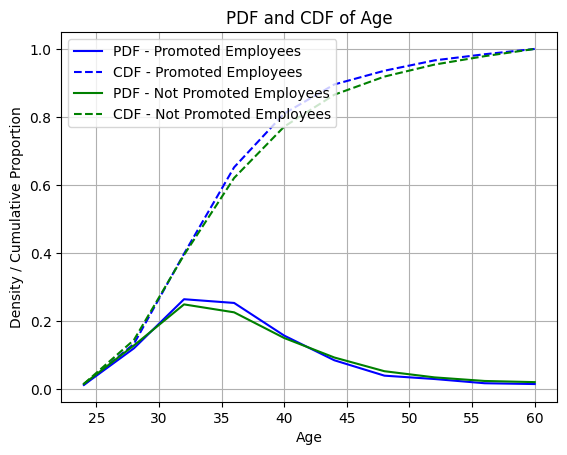

In [37]:
import numpy as np
import matplotlib.pyplot as plt

# Plot PDF and CDF for employees who got promotion
counts, bin_edges = np.histogram(promoted["age"], bins=10, density=True)
pdf = counts / sum(counts)
cdf = np.cumsum(pdf)

plt.plot(bin_edges[1:], pdf, label="PDF - Promoted Employees", color="b")
plt.plot(bin_edges[1:], cdf, label="CDF - Promoted Employees", linestyle='--', color="b")

# Plot PDF and CDF for employees who didn't get promotion
counts, bin_edges = np.histogram(not_promoted["age"], bins=10, density=True)
pdf = counts / sum(counts)
cdf = np.cumsum(pdf)

plt.plot(bin_edges[1:], pdf, label="PDF - Not Promoted Employees", color="g")
plt.plot(bin_edges[1:], cdf, label="CDF - Not Promoted Employees", linestyle='--', color="g")

# Add labels and legend
plt.title('PDF and CDF of Age')
plt.legend(loc="upper left")
plt.xlabel("Age")
plt.ylabel("Density / Cumulative Proportion")
plt.grid(True)

# Display the plot
plt.show()


**Observations**
* No significant information can be derived due to huge overlappling

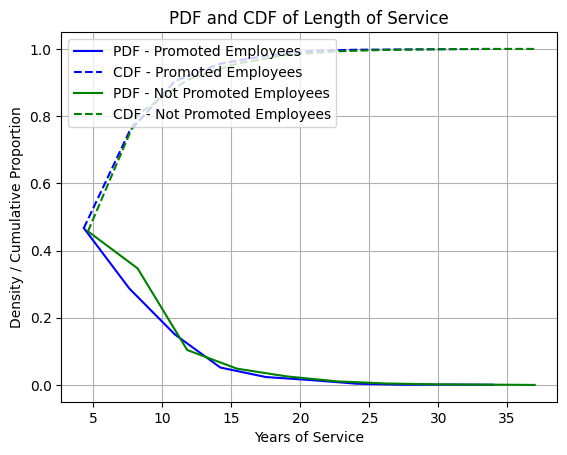

In [38]:
import numpy as np
import matplotlib.pyplot as plt

# Plot PDF and CDF for employees who got promotion
counts, bin_edges = np.histogram(promoted["length_of_service"], bins=10, density=True)
pdf = counts / sum(counts)
cdf = np.cumsum(pdf)

plt.plot(bin_edges[1:], pdf, label="PDF - Promoted Employees", color="b")
plt.plot(bin_edges[1:], cdf, label="CDF - Promoted Employees", linestyle='--', color="b")

# Plot PDF and CDF for employees who didn't get promotion
counts, bin_edges = np.histogram(not_promoted["length_of_service"], bins=10, density=True)
pdf = counts / sum(counts)
cdf = np.cumsum(pdf)

plt.plot(bin_edges[1:], pdf, label="PDF - Not Promoted Employees", color="g")
plt.plot(bin_edges[1:], cdf, label="CDF - Not Promoted Employees", linestyle='--', color="g")

# Add plot details
plt.title('PDF and CDF of Length of Service')
plt.xlabel('Years of Service')
plt.ylabel('Density / Cumulative Proportion')
plt.legend(loc="upper left")
plt.grid(True)

# Display the plot
plt.show()


**Observations**
* No significant information can be derived due to huge overlappling

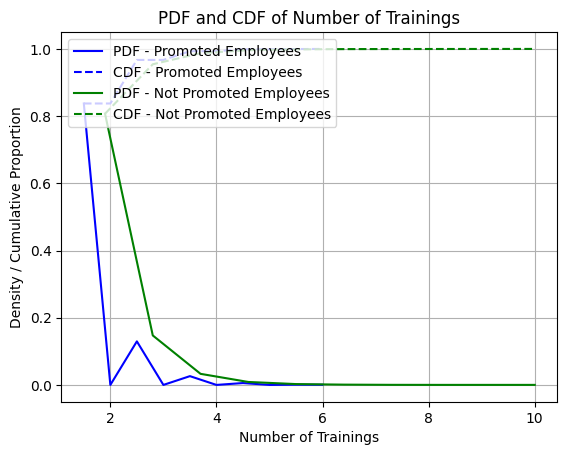

In [39]:
import numpy as np
import matplotlib.pyplot as plt

# Plot PDF and CDF for employees who got promotion
counts, bin_edges = np.histogram(promoted["no_of_trainings"], bins=10, density=True)
pdf = counts / sum(counts)
cdf = np.cumsum(pdf)

plt.plot(bin_edges[1:], pdf, label="PDF - Promoted Employees", color="b")
plt.plot(bin_edges[1:], cdf, label="CDF - Promoted Employees", linestyle='--', color="b")

# Plot PDF and CDF for employees who didn't get promotion
counts, bin_edges = np.histogram(not_promoted["no_of_trainings"], bins=10, density=True)
pdf = counts / sum(counts)
cdf = np.cumsum(pdf)

plt.plot(bin_edges[1:], pdf, label="PDF - Not Promoted Employees", color="g")
plt.plot(bin_edges[1:], cdf, label="CDF - Not Promoted Employees", linestyle='--', color="g")

# Plot details
plt.title('PDF and CDF of Number of Trainings')
plt.xlabel('Number of Trainings')
plt.ylabel('Density / Cumulative Proportion')
plt.legend(loc="upper left")
plt.grid(True)

# Display the plot
plt.show()


**Observations**
* No significant information can be derived

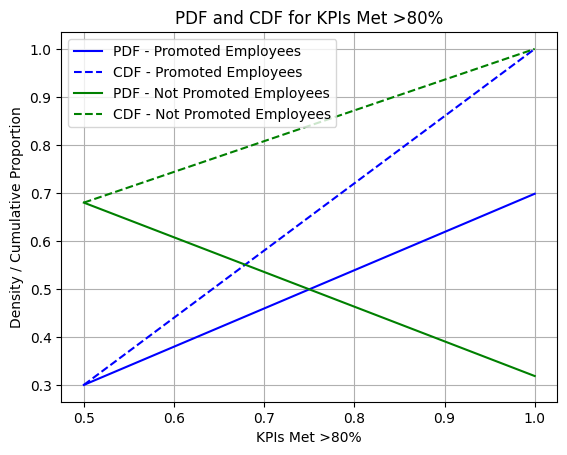

In [40]:
import numpy as np
import matplotlib.pyplot as plt

# Plot PDF and CDF for employees who got promotion
counts, bin_edges = np.histogram(promoted["KPIs_met >80%"], bins=2, density=True)  # Since it's binary (0 or 1)
pdf = counts / sum(counts)
cdf = np.cumsum(pdf)

plt.plot(bin_edges[1:], pdf, label="PDF - Promoted Employees", color="b")
plt.plot(bin_edges[1:], cdf, label="CDF - Promoted Employees", linestyle='--', color="b")

# Plot PDF and CDF for employees who didn't get promotion
counts, bin_edges = np.histogram(not_promoted["KPIs_met >80%"], bins=2, density=True)
pdf = counts / sum(counts)
cdf = np.cumsum(pdf)

plt.plot(bin_edges[1:], pdf, label="PDF - Not Promoted Employees", color="g")
plt.plot(bin_edges[1:], cdf, label="CDF - Not Promoted Employees", linestyle='--', color="g")

# Plot details
plt.title('PDF and CDF for KPIs Met >80%')
plt.xlabel('KPIs Met >80%')
plt.ylabel('Density / Cumulative Proportion')
plt.legend(loc="upper left")
plt.grid(True)

# Display the plot
plt.show()



**Observations**
No significant information can be derived.

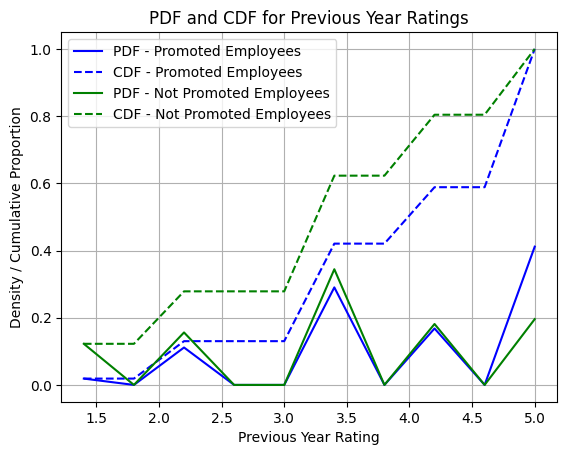

In [41]:
import numpy as np
import matplotlib.pyplot as plt

# Plot PDF and CDF for employees who got promotion
counts, bin_edges = np.histogram(promoted["previous_year_rating"], bins=10, density=True)
pdf = counts / sum(counts)
cdf = np.cumsum(pdf)

plt.plot(bin_edges[1:], pdf, label="PDF - Promoted Employees", color="b")
plt.plot(bin_edges[1:], cdf, label="CDF - Promoted Employees", linestyle='--', color="b")

# Plot PDF and CDF for employees who didn't get promotion
counts, bin_edges = np.histogram(not_promoted["previous_year_rating"], bins=10, density=True)
pdf = counts / sum(counts)
cdf = np.cumsum(pdf)

plt.plot(bin_edges[1:], pdf, label="PDF - Not Promoted Employees", color="g")
plt.plot(bin_edges[1:], cdf, label="CDF - Not Promoted Employees", linestyle='--', color="g")

# Plot details
plt.title('PDF and CDF for Previous Year Ratings')
plt.xlabel('Previous Year Rating')
plt.ylabel('Density / Cumulative Proportion')
plt.legend(loc="upper left")
plt.grid(True)

# Display the plot
plt.show()


**Observations**
* No significant information can be derived due to huge overlapping

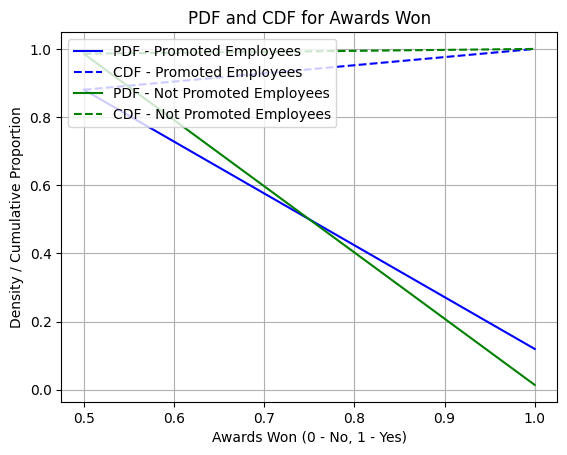

In [42]:
import numpy as np
import matplotlib.pyplot as plt

# Plot PDF and CDF for employees who got promotion
counts, bin_edges = np.histogram(promoted["awards_won?"], bins=2, density=True)  # Since it's binary (0/1)
pdf = counts / sum(counts)
cdf = np.cumsum(pdf)

plt.plot(bin_edges[1:], pdf, label="PDF - Promoted Employees", color="b")
plt.plot(bin_edges[1:], cdf, label="CDF - Promoted Employees", linestyle='--', color="b")

# Plot PDF and CDF for employees who didn't get promotion
counts, bin_edges = np.histogram(not_promoted["awards_won?"], bins=2, density=True)
pdf = counts / sum(counts)
cdf = np.cumsum(pdf)

plt.plot(bin_edges[1:], pdf, label="PDF - Not Promoted Employees", color="g")
plt.plot(bin_edges[1:], cdf, label="CDF - Not Promoted Employees", linestyle='--', color="g")

# Plot details
plt.title('PDF and CDF for Awards Won')
plt.xlabel('Awards Won (0 - No, 1 - Yes)')
plt.ylabel('Density / Cumulative Proportion')
plt.legend(loc="upper left")
plt.grid(True)

# Display the plot
plt.show()


**Observation**
* No significant information can be derived

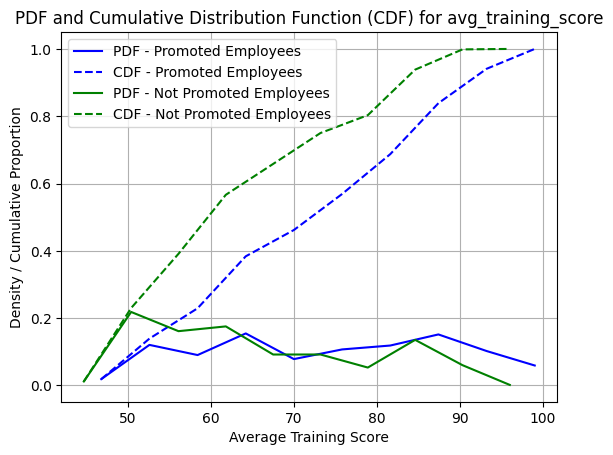

In [43]:
import matplotlib.pyplot as plt
import numpy as np

# Plot PDF and CDF for employees who got promotion
counts, bin_edges = np.histogram(promoted["avg_training_score"], bins=10, density=True)
pdf = counts / sum(counts)
cdf = np.cumsum(pdf)

plt.plot(bin_edges[1:], pdf, label="PDF - Promoted Employees", color="b")
plt.plot(bin_edges[1:], cdf, label="CDF - Promoted Employees", linestyle='--', color="b")

# Plot PDF and CDF for employees who didn't get promotion
counts, bin_edges = np.histogram(not_promoted["avg_training_score"], bins=10, density=True)
pdf = counts / sum(counts)
cdf = np.cumsum(pdf)

plt.plot(bin_edges[1:], pdf, label="PDF - Not Promoted Employees", color="g")
plt.plot(bin_edges[1:], cdf, label="CDF - Not Promoted Employees", linestyle='--', color="g")

# Plot details
plt.title('PDF and Cumulative Distribution Function (CDF) for avg_training_score')
plt.xlabel('Average Training Score')
plt.ylabel('Density / Cumulative Proportion')
plt.legend(loc="upper left")
plt.grid(True)

# Display the plot
plt.show()


**Observations**
* No significant information can be derived

### Box plot and Whiskers

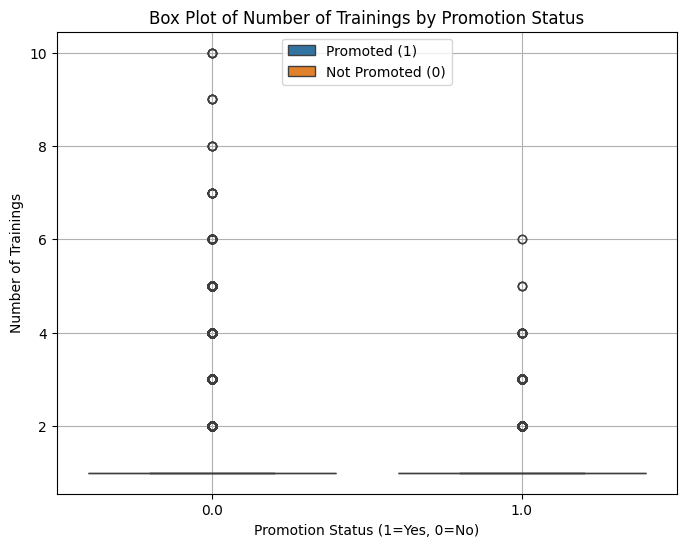

In [45]:
import seaborn as sbn
import matplotlib.pyplot as plt

# Box-plot for no_of_trainings by promotion status
plt.figure(figsize=(8, 6))
ax = sbn.boxplot(x="is_promoted", y="no_of_trainings", hue="is_promoted", data=df)

# Customizing the legend
handles, _ = ax.get_legend_handles_labels()
ax.legend(handles, ["Promoted (1)", "Not Promoted (0)"], loc="upper center")

# Adding labels to the plot
plt.xlabel("Promotion Status (1=Yes, 0=No)")
plt.ylabel("Number of Trainings")
plt.title('Box Plot of Number of Trainings by Promotion Status')
plt.grid(True)

# Display the plot
plt.show()


**Observations**
* No significant information could be derived

###Bivariate Analysis

###  Scatter Plot

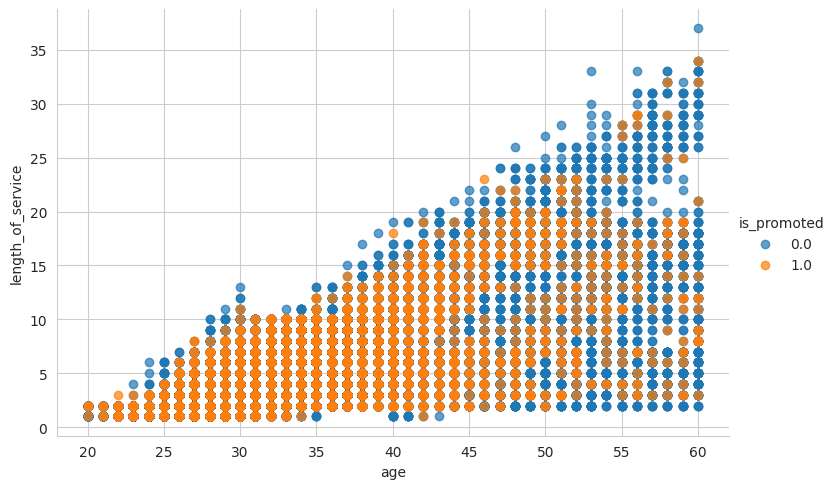

In [48]:
import seaborn as sbn
import matplotlib.pyplot as plt

# Set style for the plot
sbn.set_style("whitegrid")

# Use Seaborn's FacetGrid to explore promotion behavior
g = sbn.FacetGrid(df, hue="is_promoted", height=5, aspect=1.5)
g.map(plt.scatter, "age", "length_of_service", alpha=0.7)

# Automatically add the legend
g.add_legend()

# Display the plot
plt.show()


**Observations**  
- Employees aged between **23 to 45 years** and with a **length of service between 3 to 8 years** are more likely to get promoted.

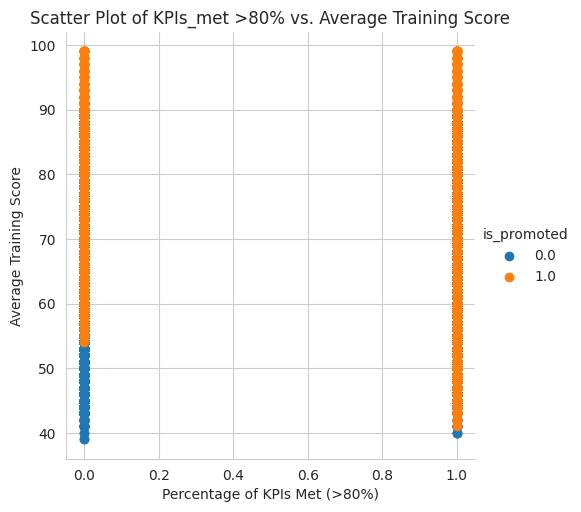

In [50]:
# Compare avg_training_score and KPIs_met >80%
sbn.set_style("whitegrid")

# Visualizing relationship with a scatter plot using seaborn's FacetGrid
sbn.FacetGrid(df, hue="is_promoted", height=5)\
   .map(plt.scatter, "KPIs_met >80%", "avg_training_score")\
   .add_legend()

# Adding plot labels for better interpretation
plt.title('Scatter Plot of KPIs_met >80% vs. Average Training Score')
plt.xlabel("Percentage of KPIs Met (>80%)")
plt.ylabel("Average Training Score")
plt.show()


**Observations**
* significant information cannot be derived.

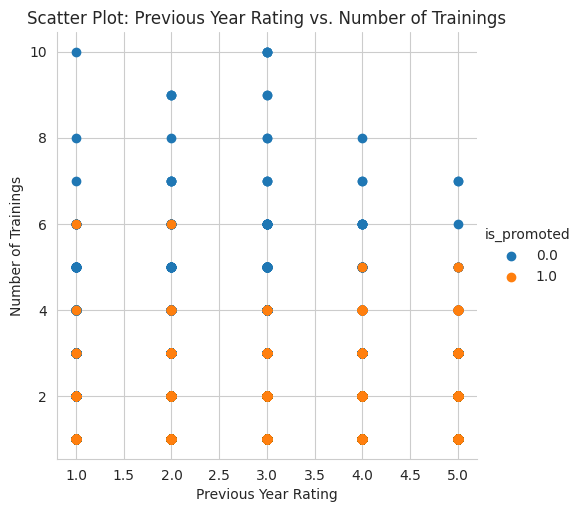

In [52]:
# Compare previous_year_rating and no_of_trainings
sbn.set_style("whitegrid")

# Use Seaborn's FacetGrid to visualize the relationship with a scatter plot
sbn.FacetGrid(df, hue="is_promoted", height=5) \
   .map(plt.scatter, "previous_year_rating", "no_of_trainings") \
   .add_legend()

# Adding plot titles and labels
plt.title('Scatter Plot: Previous Year Rating vs. Number of Trainings')
plt.xlabel('Previous Year Rating')
plt.ylabel('Number of Trainings')
plt.show()


**Observation**
* Due to considerable overlaps, No significant information can be derived

###Histogram (with PDF)

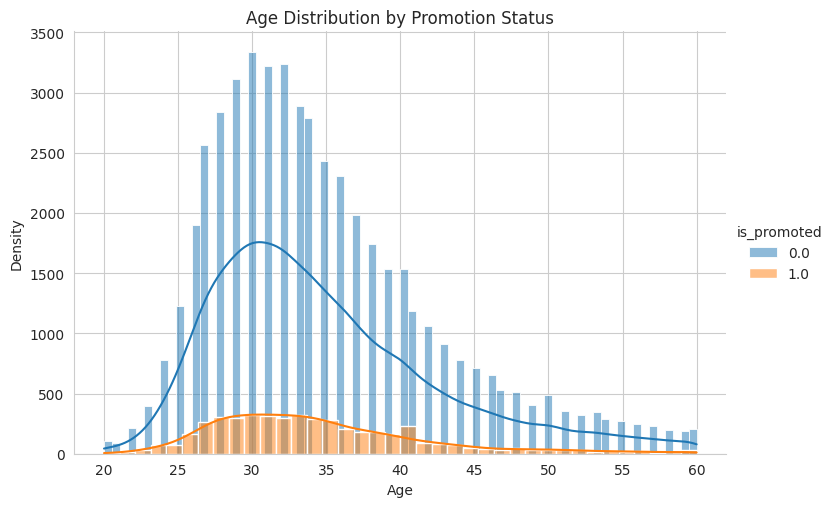

In [60]:
# Set the style for the plot
sbn.set_style("whitegrid")

# Use Seaborn's FacetGrid to visualize age distribution by promotion status
g = sbn.FacetGrid(df, hue="is_promoted", height=5, aspect=1.5)
g.map(sbn.histplot, "age", kde=True)  # Using histplot with KDE
g.add_legend()

plt.title('Age Distribution by Promotion Status')
plt.xlabel('Age')
plt.ylabel('Density')

plt.show()


**Observation**
* Employee b/w age 33-36 has more promotion chances

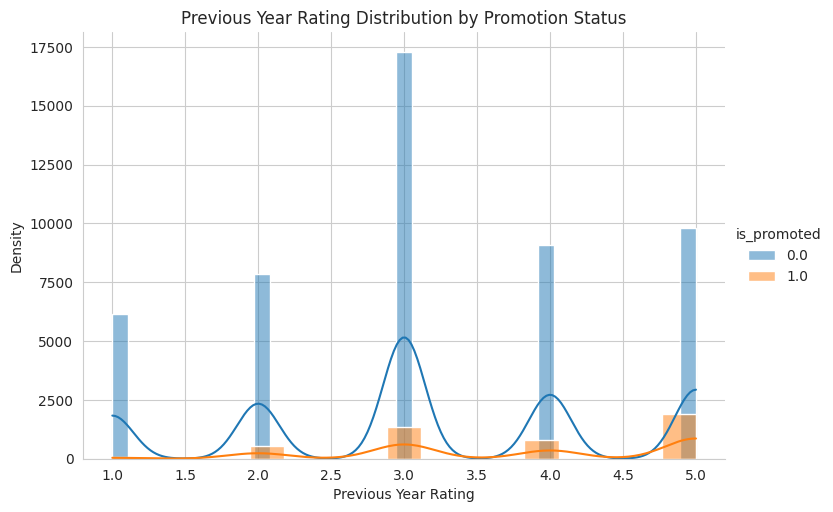

In [61]:
# Set the style for the plot
sbn.set_style("whitegrid")

# Use Seaborn's FacetGrid to visualize previous_year_rating by promotion status
g = sbn.FacetGrid(df, hue="is_promoted", height=5, aspect=1.5)
g.map(sbn.histplot, "previous_year_rating", kde=True)  # Using histplot with KDE
g.add_legend()

plt.title('Previous Year Rating Distribution by Promotion Status')
plt.xlabel('Previous Year Rating')
plt.ylabel('Density')

plt.show()


**Observation**
* Employee with rating 5 has high chance of promotion

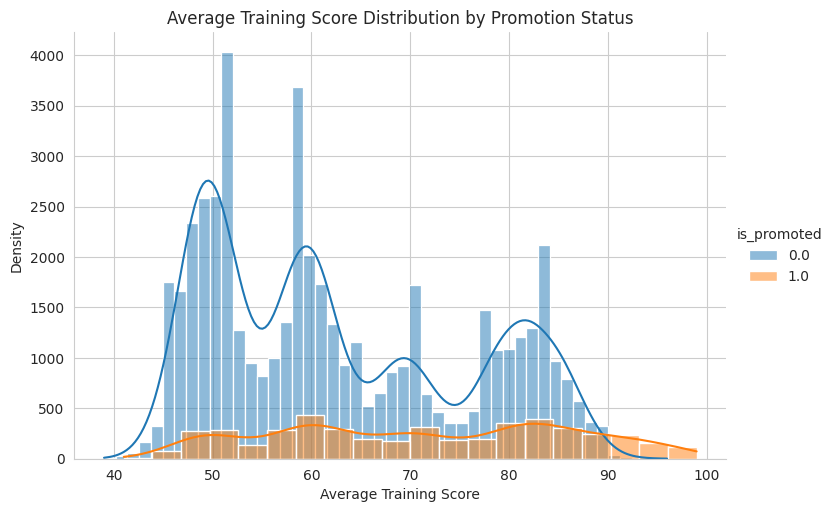

In [62]:
# Set the style for the plot
sbn.set_style("whitegrid")

# Use Seaborn's FacetGrid to visualize avg_training_score by promotion status
g = sbn.FacetGrid(df, hue="is_promoted", height=5, aspect=1.5)
g.map(sbn.histplot, "avg_training_score", kde=True)  # Using histplot with KDE
g.add_legend()

plt.title('Average Training Score Distribution by Promotion Status')
plt.xlabel('Average Training Score')
plt.ylabel('Density')

plt.show()


**Observation**
* Employee with avg_training_score b/w 45-55 has less chance of promotion
* Employee with avg_training_score > 85 has more chance of promotion

## Cleaning the data


In [63]:
# To change the data type of previous_year_rating as int
df_dummies[['previous_year_rating']] = df_dummies[['previous_year_rating']].astype(int)

In [64]:
# To validate the data types of all the variables
df_dummies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78298 entries, 0 to 78297
Data columns (total 61 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   employee_id                   78298 non-null  int64  
 1   gender                        78298 non-null  int64  
 2   no_of_trainings               78298 non-null  int64  
 3   age                           78298 non-null  int64  
 4   previous_year_rating          78298 non-null  int64  
 5   length_of_service             78298 non-null  int64  
 6   KPIs_met >80%                 78298 non-null  int64  
 7   awards_won?                   78298 non-null  int64  
 8   avg_training_score            78298 non-null  int64  
 9   is_promoted                   54808 non-null  float64
 10  is_test_set                   78298 non-null  int64  
 11  department_Analytics          78298 non-null  bool   
 12  department_Finance            78298 non-null  bool   
 13  d

In [65]:
#To see the total number of columns in final dataframe
len(df_dummies.columns)

61

In [66]:
# To check the all column names
df_dummies.columns

Index(['employee_id', 'gender', 'no_of_trainings', 'age',
       'previous_year_rating', 'length_of_service', 'KPIs_met >80%',
       'awards_won?', 'avg_training_score', 'is_promoted', 'is_test_set',
       'department_Analytics', 'department_Finance', 'department_HR',
       'department_Legal', 'department_Operations', 'department_Procurement',
       'department_R&D', 'department_Sales & Marketing',
       'department_Technology', 'region_1', 'region_10', 'region_11',
       'region_12', 'region_13', 'region_14', 'region_15', 'region_16',
       'region_17', 'region_18', 'region_19', 'region_2', 'region_20',
       'region_21', 'region_22', 'region_23', 'region_24', 'region_25',
       'region_26', 'region_27', 'region_28', 'region_29', 'region_3',
       'region_30', 'region_31', 'region_32', 'region_33', 'region_34',
       'region_4', 'region_5', 'region_6', 'region_7', 'region_8', 'region_9',
       'education_Bachelor's', 'education_Below Secondary',
       'education_Master's 

In [67]:
# To change the sequence of columns and store the data points into new_df

new_df = df_dummies[['gender', 'no_of_trainings', 'age', \
       'previous_year_rating', 'length_of_service', 'KPIs_met >80%', \
       'awards_won?', 'avg_training_score', \
       'department_Analytics', 'department_Finance', 'department_HR', \
       'department_Legal', 'department_Operations', 'department_Procurement', \
       'department_R&D', 'department_Sales & Marketing', 'department_Technology', \
       'region_1', 'region_2', 'region_3', 'region_4', 'region_5', \
       'region_6', 'region_7', 'region_8', 'region_9', 'region_10', 'region_11', \
       'region_12', 'region_13', 'region_14', 'region_15', 'region_16', \
       'region_17', 'region_18', 'region_19', 'region_20', \
       'region_21', 'region_22', 'region_23', 'region_24', 'region_25', \
       'region_26', 'region_27', 'region_28', 'region_29', 'region_30', \
       'region_31', 'region_32', 'region_33', 'region_34', \
       'education_Below Secondary', 'education_Bachelor\'s', \
       'education_Master\'s & above', 'education_Not_Known', \
       'recruitment_channel_referred', 'recruitment_channel_sourcing', \
       'recruitment_channel_other', 'is_test_set', 'is_promoted']];

In [68]:
new_df.columns

Index(['gender', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'KPIs_met >80%', 'awards_won?',
       'avg_training_score', 'department_Analytics', 'department_Finance',
       'department_HR', 'department_Legal', 'department_Operations',
       'department_Procurement', 'department_R&D',
       'department_Sales & Marketing', 'department_Technology', 'region_1',
       'region_2', 'region_3', 'region_4', 'region_5', 'region_6', 'region_7',
       'region_8', 'region_9', 'region_10', 'region_11', 'region_12',
       'region_13', 'region_14', 'region_15', 'region_16', 'region_17',
       'region_18', 'region_19', 'region_20', 'region_21', 'region_22',
       'region_23', 'region_24', 'region_25', 'region_26', 'region_27',
       'region_28', 'region_29', 'region_30', 'region_31', 'region_32',
       'region_33', 'region_34', 'education_Below Secondary',
       'education_Bachelor's', 'education_Master's & above',
       'education_Not_Known', 'recruitment

In [69]:
len(new_df.columns)

60

## 6. Model Building and Evaluation


In [70]:
# Let's divide new_df into train and test datasets
train = new_df[new_df["is_test_set"] == 0]
test = new_df[new_df["is_test_set"] == 1]

# Remove the is_test_set column from both train and test
del train['is_test_set']
del test['is_test_set']

# To check the location of the dependent variable/column
train.columns.get_loc("is_promoted")


58

In [71]:
# Assigning default value as zero for now to test dataset for is_promoted column
test['is_promoted'] = 0.0

# Convert train dataset to a NumPy array and split features and target
train_array = train.values
X_train = train_array[:, 0:58]  # Select first 58 columns as features
Y_train = train_array[:, 58]     # Target column 'is_promoted'

# Convert test dataset to a NumPy array and split features and target
test_array = test.values
X_test = test_array[:, 0:58]     # Test dataset features
Y_test = test_array[:, 58]       # Test dataset target 'is_promoted'


In [72]:
# To set test options and evaluation metric
seed = 7
scoring = 'accuracy'

In [74]:
# Ensure target labels are integers (0 and 1)
Y_train = Y_train.astype(int)

# Define models to evaluate
models = [
    ('LR', LogisticRegression(max_iter=500)),
    ('LDA', LinearDiscriminantAnalysis()),
    ('KNN', KNeighborsClassifier(n_neighbors=5)),
    ('CART', DecisionTreeClassifier(random_state=seed)),
    ('NB', GaussianNB()),
    ('QDA', QuadraticDiscriminantAnalysis())
]

# Set seed and scoring method
seed = 42
scoring = 'accuracy'

# Evaluate each model using cross-validation
results = []
names = []

for name, model in models:
    kfold = KFold(n_splits=10, random_state=seed, shuffle=True)
    try:
        cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
        results.append(cv_results)
        names.append(name)
        msg = f"{name}: Mean Accuracy: {cv_results.mean():.4f}, Std: {cv_results.std():.4f}"
        print(msg)
    except ValueError as e:
        print(f"{name} failed due to a ValueError: {str(e)}")


LR: Mean Accuracy: 0.9320, Std: 0.0047
LDA: Mean Accuracy: 0.9339, Std: 0.0045
KNN: Mean Accuracy: 0.9217, Std: 0.0040
CART: Mean Accuracy: 0.8994, Std: 0.0049
NB: Mean Accuracy: 0.5340, Std: 0.0497
QDA: Mean Accuracy: 0.6439, Std: 0.1681



* We can see that it looks like LDA has the largest estimated accuracy score.

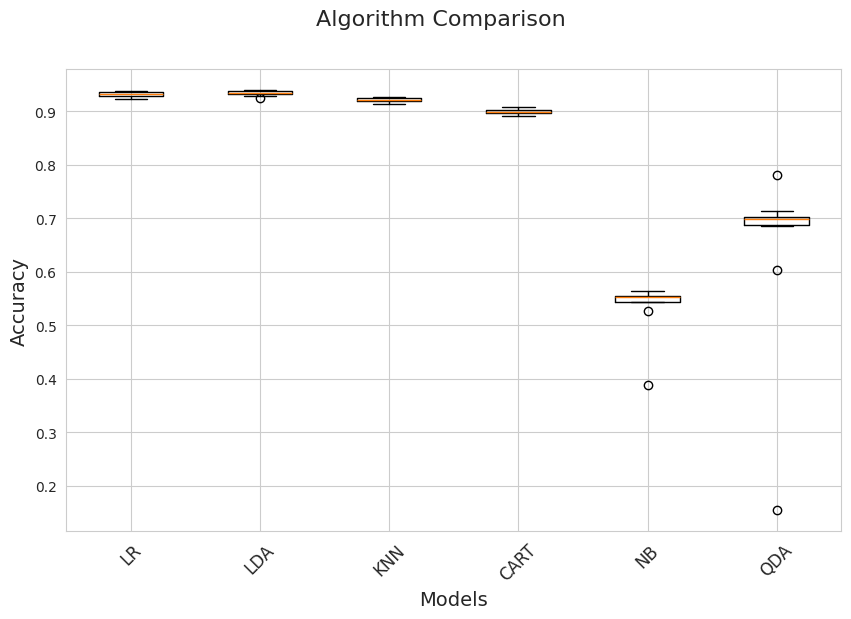

In [75]:
# To Compare Algorithms
# Plot a comparison of model evaluation results using a boxplot
fig = plt.figure(figsize=(10, 6))
fig.suptitle('Algorithm Comparison', fontsize=16)

# Plot a boxplot to compare the accuracy of each model
ax = fig.add_subplot(111)
plt.boxplot(results)

# Label models on the x-axis
ax.set_xticklabels(names, rotation=45, fontsize=12)
plt.xlabel('Models', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)

plt.grid(True)
plt.show()




* Linear Discriminant Analysis acheives the best accuracy

In [78]:
print("Unique values in Y_test:", np.unique(Y_test))


Unique values in Y_test: [0.0]


In [79]:
Y_test = np.where(Y_test > 0, 1, 0)  # Treat anything greater than 0 as 1, otherwise as 0.

In [80]:
print("Unique values in Y_test after cleaning:", np.unique(Y_test))


Unique values in Y_test after cleaning: [0]


In [81]:
print("Accuracy of the LDA Model:", accuracy_score(Y_test, predictions))
print("\nConfusion Matrix:")
print(confusion_matrix(Y_test, predictions))

print("\nClassification Report:")
print(classification_report(Y_test, predictions))


Accuracy of the LDA Model: 0.9693486590038314

Confusion Matrix:
[[22770   720]
 [    0     0]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.97      0.98     23490
           1       0.00      0.00      0.00         0

    accuracy                           0.97     23490
   macro avg       0.50      0.48      0.49     23490
weighted avg       1.00      0.97      0.98     23490



In [91]:
# Save the predictions for test dataset into a CSV file
df_dummies.loc[df_dummies.is_test_set == 1, ['employee_id', 'is_promoted']].assign(is_promoted=list(predictions))\
    .to_csv('sample_submission.csv', index=False)

print("Predictions saved to sample_submission.csv")

# Read the CSV back into a DataFrame to count the number of employees predicted to be promoted
sample_submission = pd.read_csv('sample_submission.csv')

# Count the number of employees predicted to be promoted
num_promoted = sample_submission[sample_submission['is_promoted'] == 1].shape[0]

print(f"Number of employees predicted for promotion: {num_promoted}")



Predictions saved to sample_submission.csv
Number of employees predicted for promotion: 720
